In [1]:
# Import essential libraries for data science and machine learning
import numpy as np  # Numerical computing and array operations
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Data visualization and plotting
import seaborn as sns  # Advanced statistical data visualization
import warnings  # Warning messages control

# Suppress warning messages for cleaner output
warnings.filterwarnings('ignore')

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

Data Loading

In [2]:
#loading Data
df = pd.read_csv('healthcare-dataset-stroke-data.csv',index_col='id')

In [3]:
# Display the first few rows
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Check the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [5]:
# Check the dimensions of the data frame (rows and columns)
df.shape

(5110, 11)

In [6]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False).head(8)

bmi               201
gender              0
age                 0
hypertension        0
heart_disease       0
ever_married        0
work_type           0
Residence_type      0
dtype: int64

Data Cleaning and Preprocessing

Skew = 1.0553402052962912


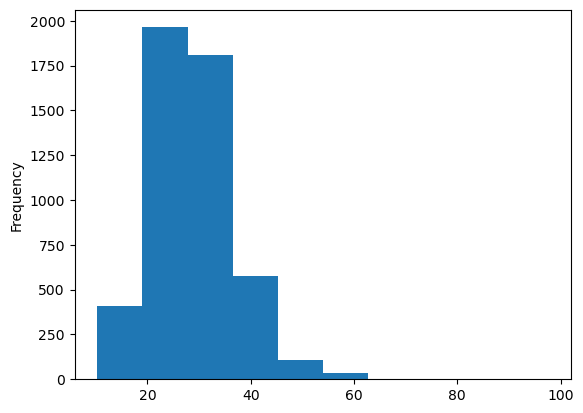

In [7]:
# Plotting the histogram of bmi and calculating skewness to analyze distribution shape
df['bmi'].plot(kind='hist')
Skew = df['bmi'].skew()
print("Skew =",Skew)
plt.show()

In [8]:
# Calculate the median value of the 'bmi' column
df['bmi'].median()

28.1

In [9]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with median strategy
impute = SimpleImputer(strategy='median')

# Impute missing values in 'bmi' column using median
df['bmi'] = impute.fit_transform(df[['bmi']])

In [10]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False).head(10)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [12]:
# Selecting numerical columns from DataFrame
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# numerical columns Display
numeric_cols

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

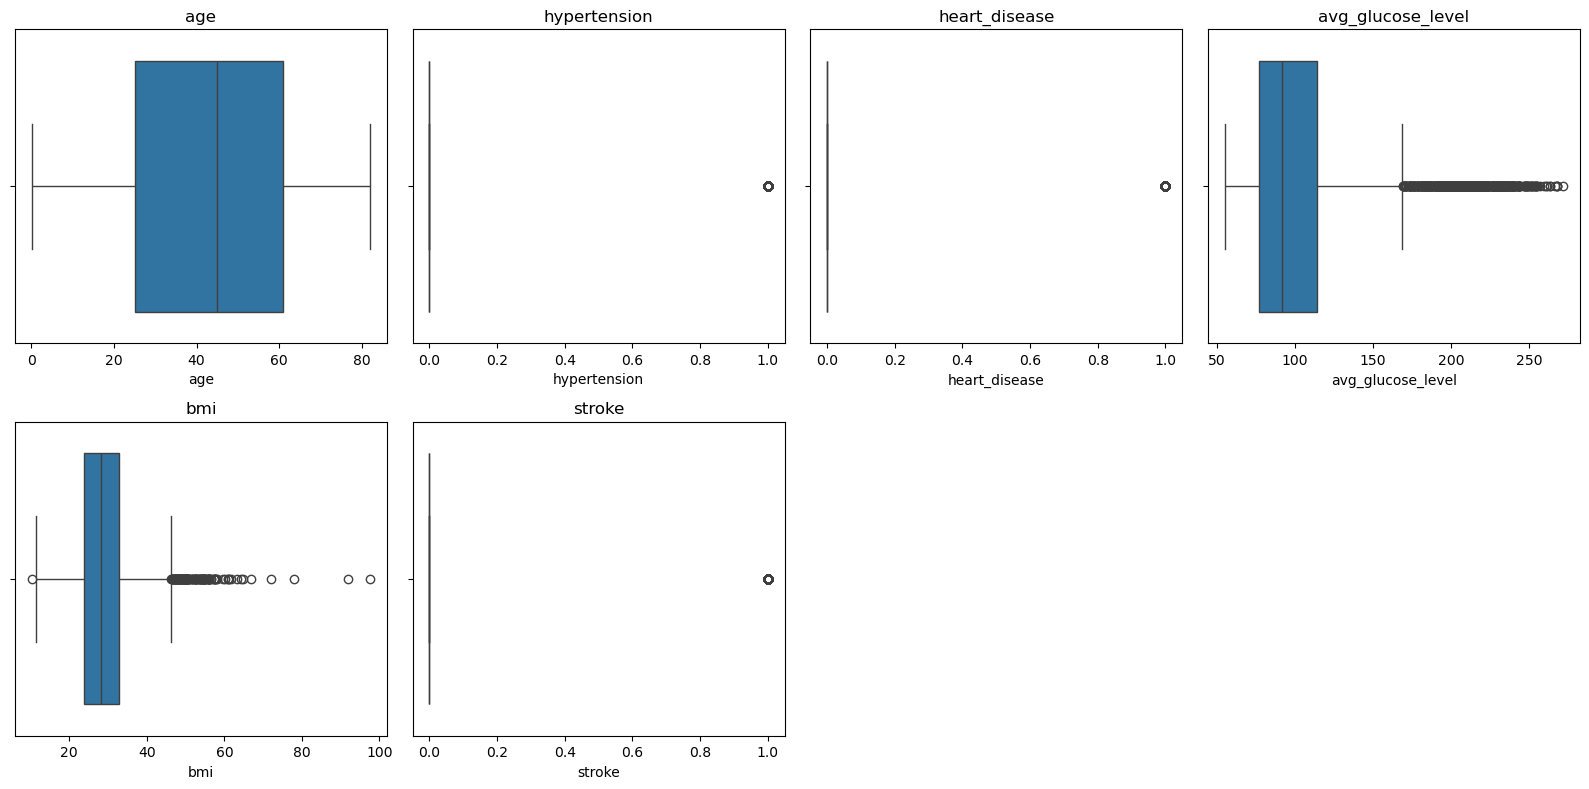

In [13]:
import math

# Calculate grid dimensions for subplots
num_cols = len(numeric_cols)  # Get total number of numeric columns
cols_per_row = 4  # Set number of boxplots per row
rows = math.ceil(num_cols / cols_per_row)  # Calculate required rows (round up)

# Create figure with dynamic size based on grid dimensions
plt.figure(figsize=(4*cols_per_row, 4*rows))

# Loop through each numeric column and create boxplot
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols_per_row, i+1)  # Create subplot at position i+1
    sns.boxplot(x=df[col])  # Create boxplot for current column
    plt.title(f"{col}")  # Set title as column name
    plt.tight_layout()  # Adjust spacing between subplots

# Display the complete grid of boxplots
plt.show()

In [14]:
# Dictionary to store outlier counts for each column
outlier_counts = {}

# Loop through each numeric column to detect outliers
for col in numeric_cols:
    # Calculate quartiles and IQR (Interquartile Range)
    Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    
    # Calculate lower and upper bounds for outliers
    lower = Q1 - 1.5 * IQR  # Lower bound
    upper = Q3 + 1.5 * IQR  # Upper bound
    
    # Count outliers (values outside the lower and upper bounds)
    count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_counts[col] = count

# Print the outlier counts for all numeric columns
print(outlier_counts)

{'age': 0, 'hypertension': 498, 'heart_disease': 276, 'avg_glucose_level': 627, 'bmi': 126, 'stroke': 249}


In [15]:

# List of columns to treat for outliers
cols_to_fix = ['avg_glucose_level', 'bmi']

for col in cols_to_fix:
    # Calculate quartiles and IQR
    Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    
    # Calculate lower and upper bounds for outliers
    lower = Q1 - 1.5 * IQR  # Lower bound
    upper = Q3 + 1.5 * IQR  # Upper bound
    
    # Cap outliers at the bounds (Winsorization)
    df[col] = np.where(df[col] > upper, upper,
                       np.where(df[col] < lower, lower, df[col]))

In [16]:
# Dictionary to store outlier counts for each column
outlier_counts = {}

# Loop through each numeric column to detect outliers
for col in numeric_cols:
    # Calculate quartiles and IQR (Interquartile Range)
    Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    
    # Calculate lower and upper bounds for outliers
    lower = Q1 - 1.5 * IQR  # Lower bound
    upper = Q3 + 1.5 * IQR  # Upper bound
    
    # Count outliers (values outside the lower and upper bounds)
    count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_counts[col] = count

# Print the outlier counts for all numeric columns
print(outlier_counts)

{'age': 0, 'hypertension': 498, 'heart_disease': 276, 'avg_glucose_level': 0, 'bmi': 0, 'stroke': 249}


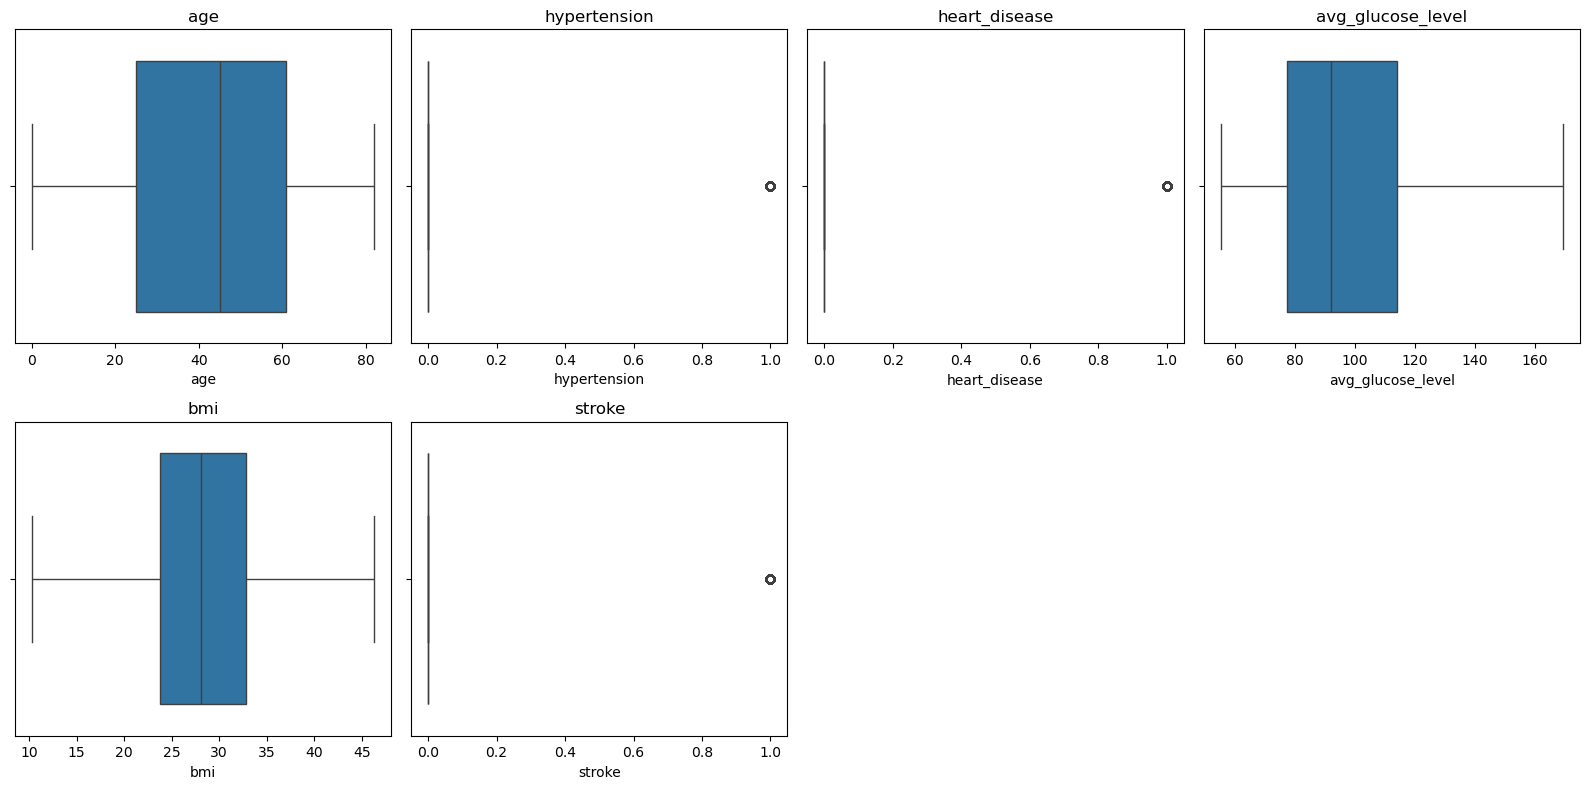

In [17]:


# Calculate grid dimensions for subplots
num_cols = len(numeric_cols)  # Get total number of numeric columns
cols_per_row = 4  # Set number of boxplots per row
rows = math.ceil(num_cols / cols_per_row)  # Calculate required rows (round up)

# Create figure with dynamic size based on grid dimensions
plt.figure(figsize=(4*cols_per_row, 4*rows))

# Loop through each numeric column and create boxplot
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols_per_row, i+1)  # Create subplot at position i+1
    sns.boxplot(x=df[col])  # Create boxplot for current column
    plt.title(f"{col}")  # Set title as column name
    plt.tight_layout()  # Adjust spacing between subplots

# Display the complete grid of boxplots
plt.show()

In [18]:
# Select and display columns with object data type (typically strings/categorical)
df.select_dtypes(include='object').columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [19]:
#LabelEncoder('gender','ever_married','Residence_type')

#noe hot encoder('smoking_status','work_type')

In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to specific categorical columns
for col in ['gender', 'ever_married', 'Residence_type']:
    df[col] = le.fit_transform(df[col])

In [21]:
# Apply One-Hot Encoding to specified categorical columns
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=False)

In [22]:
df.shape

(5110, 18)

stroke                            1.000000
age                               0.245257
heart_disease                     0.134914
hypertension                      0.127904
avg_glucose_level                 0.115652
ever_married                      0.108340
smoking_status_formerly smoked    0.064556
work_type_Self-employed           0.062168
bmi                               0.042700
Residence_type                    0.015458
work_type_Private                 0.011888
smoking_status_smokes             0.008939
gender                            0.008929
work_type_Govt_job                0.002677
smoking_status_never smoked      -0.004129
work_type_Never_worked           -0.014882
smoking_status_Unknown           -0.055892
work_type_children               -0.083869
Name: stroke, dtype: float64


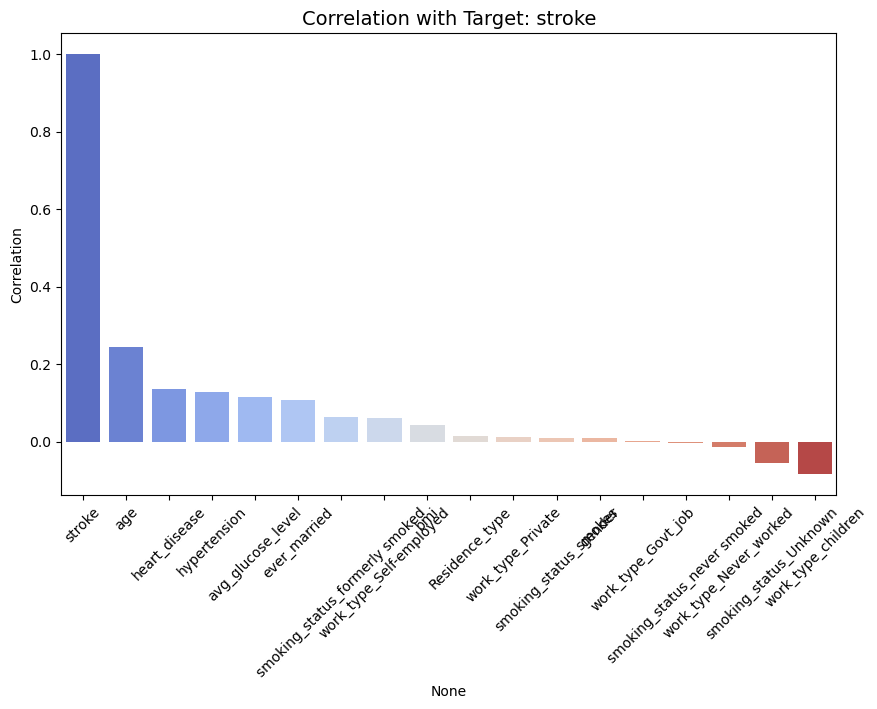

In [23]:
# 🔹 Achievement Comment:
corr = df.corr()

# Correlation of columns with the 'stroke' column
corr_target = corr['stroke'].sort_values(ascending=False)  # تصاعديًا أو تنازليًا حسب الرغبة

# Show results
print(corr_target)

# Correction bar drawing
plt.figure(figsize=(10,6))
sns.barplot(x=corr_target.index, y=corr_target.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Correlation with Target: stroke", fontsize=14)
plt.ylabel("Correlation")
plt.show()

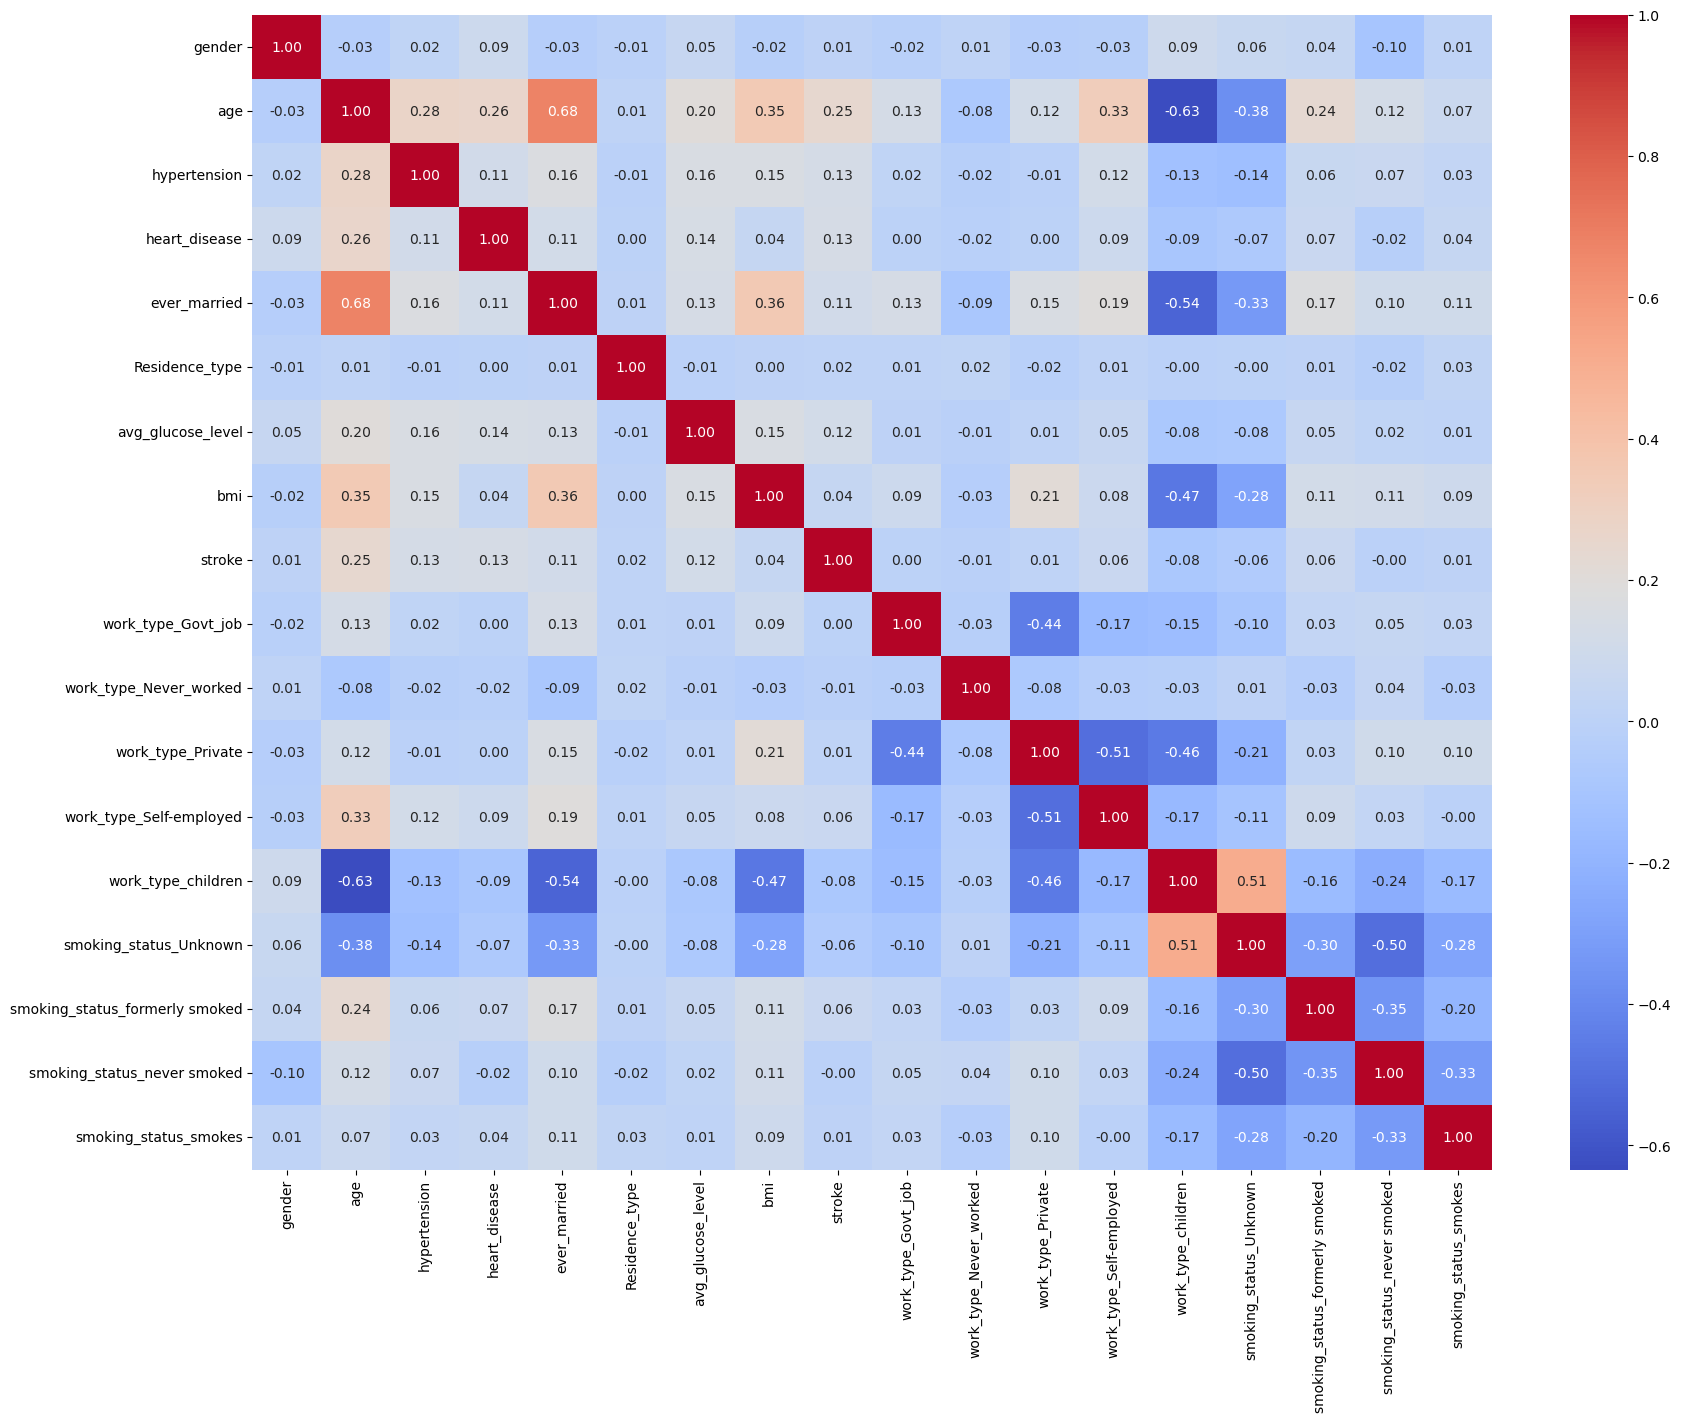

In [24]:
# Calculate correlation matrix for all numerical columns
corr = df.corr()

# Create a large figure for better visibility
plt.figure(figsize=(20,15))

# Generate correlation heatmap with annotations
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

# Display the plot
plt.show()

In [25]:
# Display unique values in the 'stroke' column
print(df['stroke'].unique())

[1 0]


In [26]:
# Selecting numerical columns from DataFrame
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# numerical columns Display
numeric_cols

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [27]:
# Splitting data to input features and output target
X = df.drop('stroke', axis=1)  # Input features (all columns except target)
y = df['stroke']  # Output label (target variable)

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

Training data: (4088, 17)
Testing data: (1022, 17)


In [28]:
# Select all column names except 'Accident_Severity'
num_cols = df.columns.drop('stroke')

In [29]:
from sklearn.preprocessing import MinMaxScaler
import pickle

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select numerical columns only
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Apply MinMax scaling to training and test data
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Save the fitted scaler to a pickle file for future use
with open('robust_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [30]:
# Count the frequency of each unique value in the 'Accident_Severity' column
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

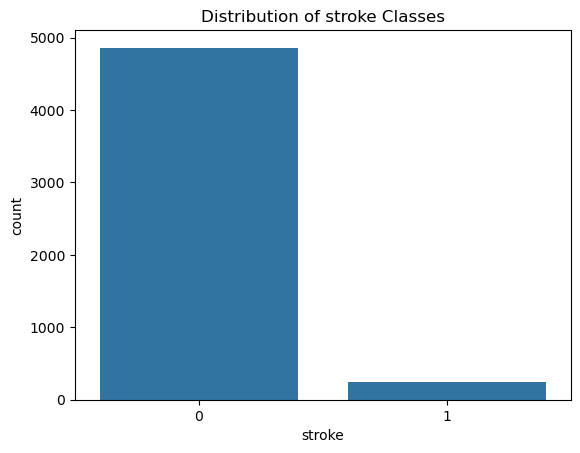

In [31]:
# Create a count plot to visualize the distribution of accident severity classes
sns.countplot(x='stroke', data=df)
plt.title('Distribution of stroke Classes')
plt.show()

In [32]:
# Importing Machine Learning Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Ensemble Methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Enable experimental Histogram Gradient Boosting
from sklearn.experimental import enable_hist_gradient_boosting  # Needed for HistGB
from sklearn.ensemble import HistGradientBoostingClassifier

# Advanced Gradient Boosting Libraries
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# For multi-class classification
from sklearn.preprocessing import label_binarize


In [33]:
# Dictionary of classification models with their configurations
models = {
    "Logistic Regression": LogisticRegression(),
    
    #"KNN": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1), # minkowski, euclidean, manhattan

    "GaussianNB": GaussianNB(),

    #"SVM": SVC(kernel='linear', C=100, gamma=1, probability=True), # kernel='rbf' / kernel='poly', degree=4 / kernel='sigmoid

    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=10), # {"gini", "entropy", "log_loss"}
    
    "Random Forest": RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=10), # {"gini", "entropy", "log_loss"}
    
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10), 
                                n_estimators=50, random_state=42),
    
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    
    "HistGradientBoosting": HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, random_state=42),
    
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, 
                            use_label_encoder=False, eval_metric='logloss', random_state=42),
    
    "CatBoost": CatBoostClassifier(verbose=0, iterations=100, learning_rate=0.1, random_state=42),
    
    "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [34]:
from sklearn.metrics import (
    accuracy_score,      # Calculate accuracy
    precision_score,     # Calculate precision
    recall_score,        # Calculate recall (sensitivity)
    f1_score,           # Calculate F1-score (harmonic mean of precision and recall)
    confusion_matrix,    # Create confusion matrix
    classification_report, # Generate detailed classification report
    roc_auc_score,      # Calculate Area Under ROC Curve
    roc_curve,          # Generate ROC curve data
    auc,                # Calculate area under curve
    precision_recall_curve, # Generate precision-recall curve data
    average_precision_score # Calculate average precision score
)


===== Model: Logistic Regression =====


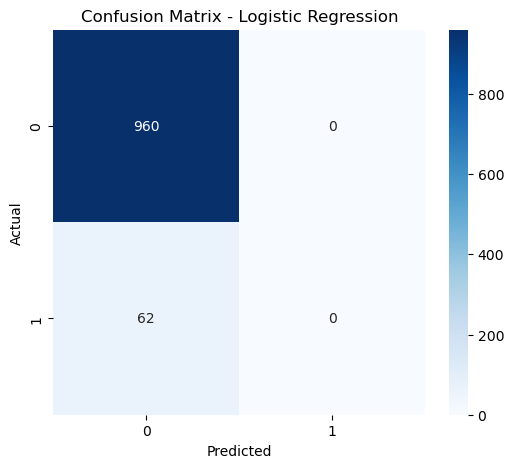


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

ROC-AUC (binary): 0.851


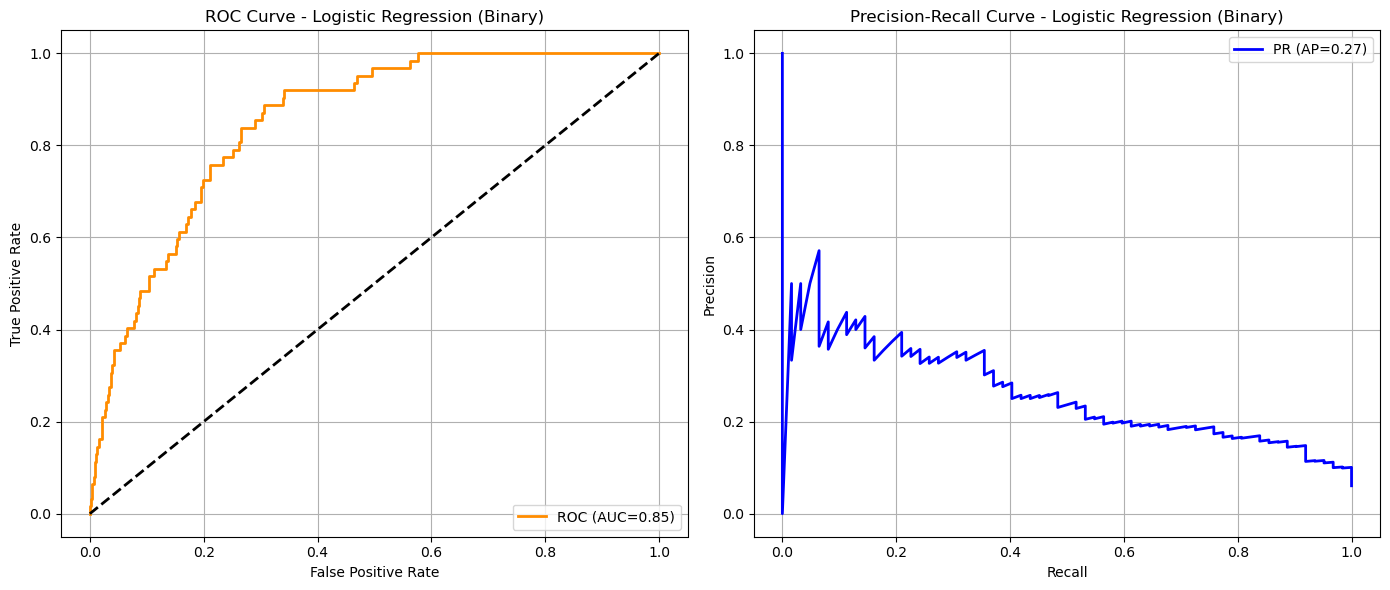


===== Model: GaussianNB =====


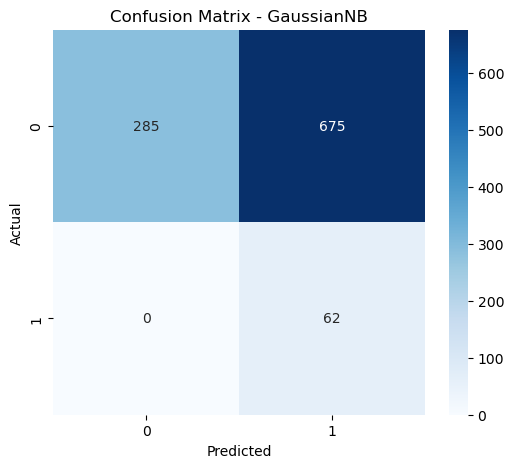


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.30      0.46       960
           1       0.08      1.00      0.16        62

    accuracy                           0.34      1022
   macro avg       0.54      0.65      0.31      1022
weighted avg       0.94      0.34      0.44      1022

ROC-AUC (binary): 0.830


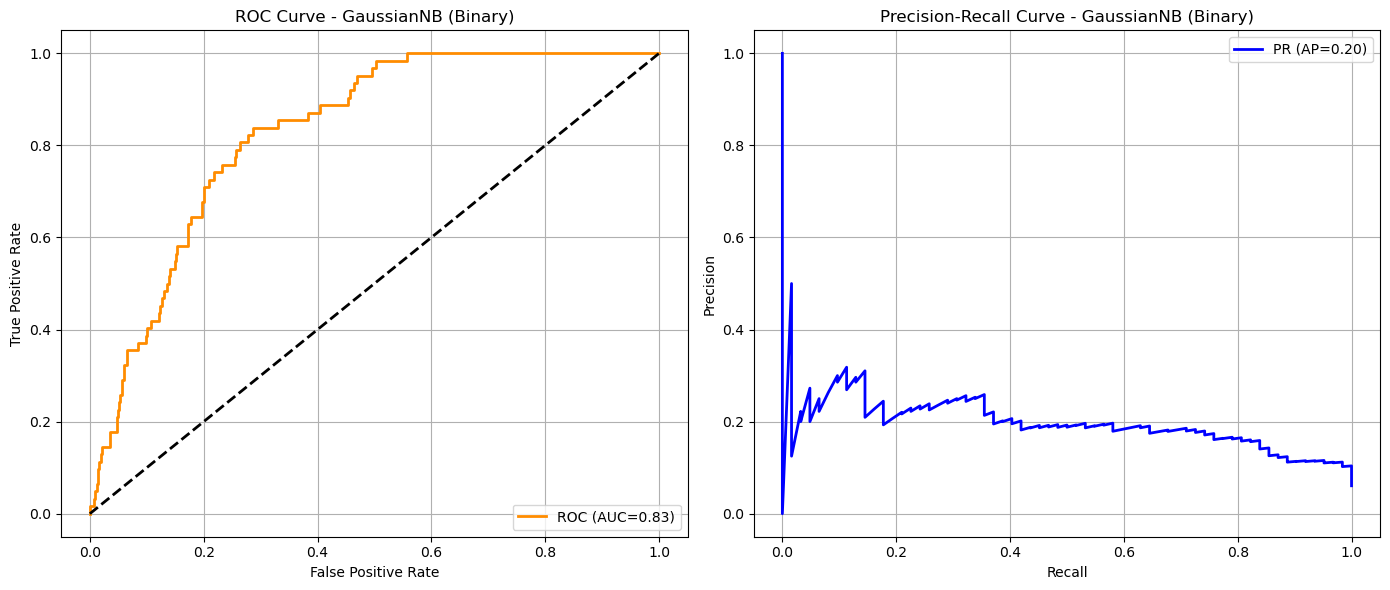


===== Model: Decision Tree =====


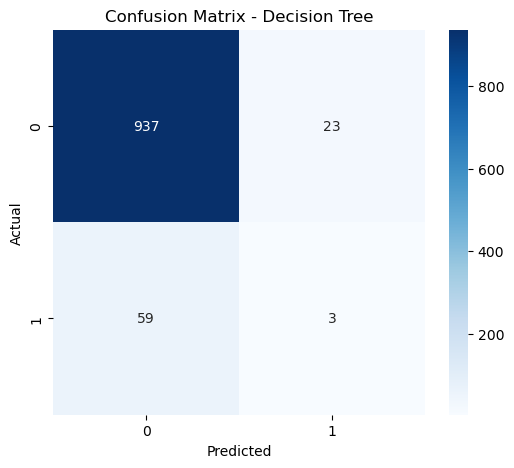


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       960
           1       0.12      0.05      0.07        62

    accuracy                           0.92      1022
   macro avg       0.53      0.51      0.51      1022
weighted avg       0.89      0.92      0.90      1022

ROC-AUC (binary): 0.716


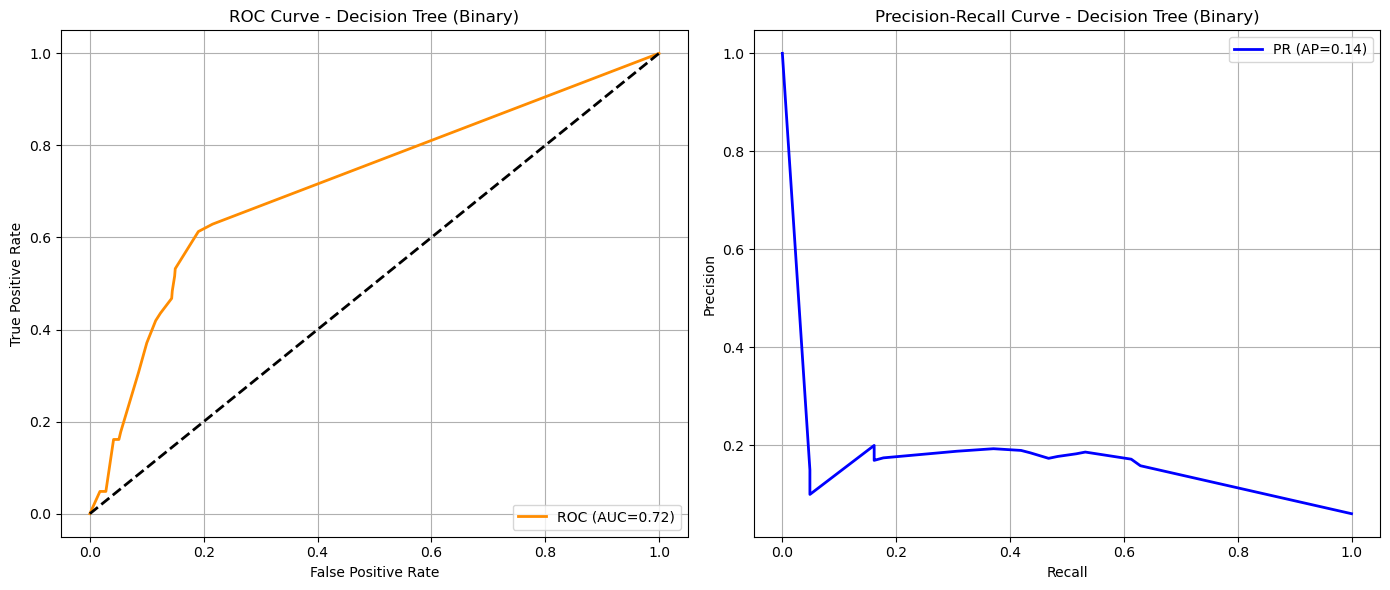


===== Model: Random Forest =====


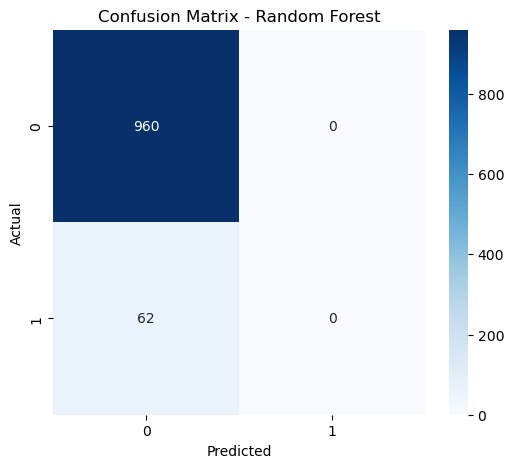


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

ROC-AUC (binary): 0.823


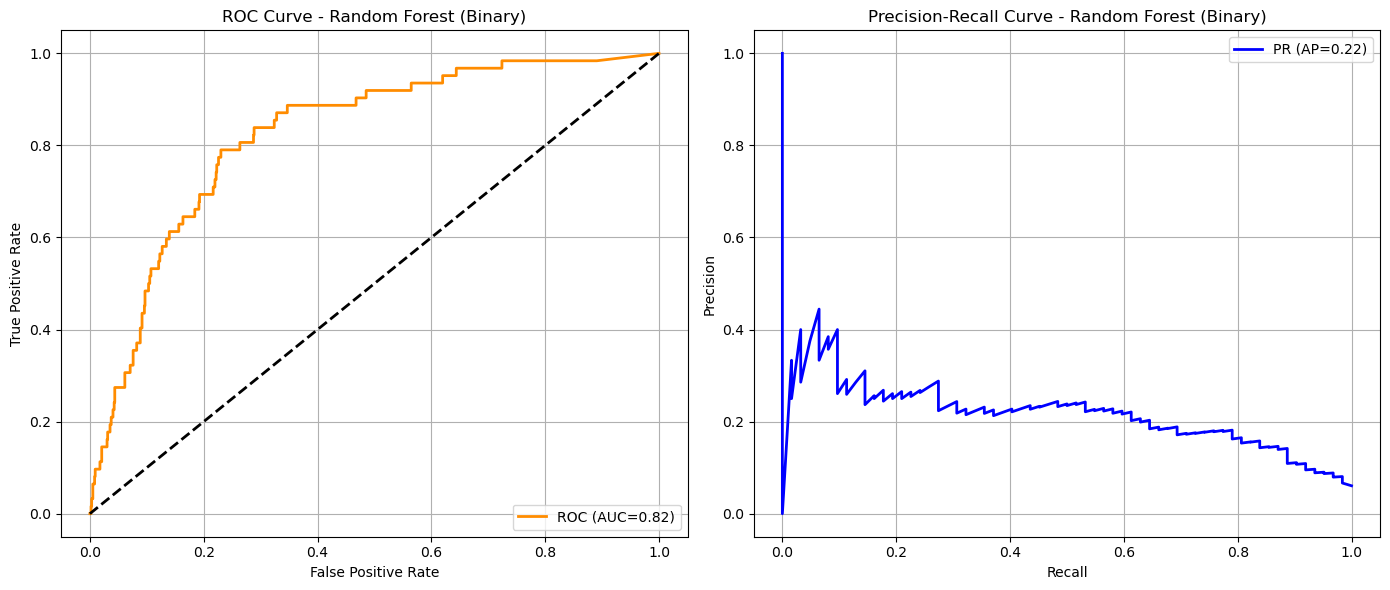


===== Model: ExtraTrees =====


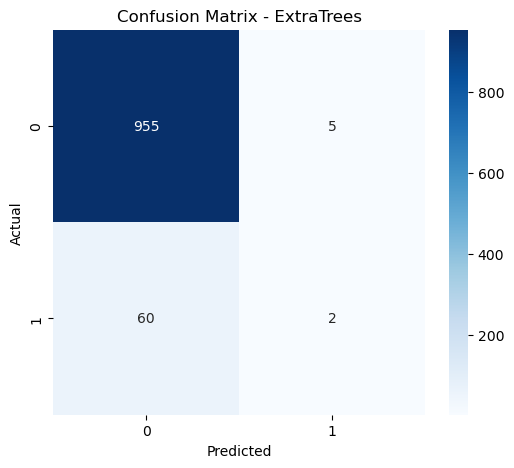


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.29      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg       0.61      0.51      0.51      1022
weighted avg       0.90      0.94      0.91      1022

ROC-AUC (binary): 0.733


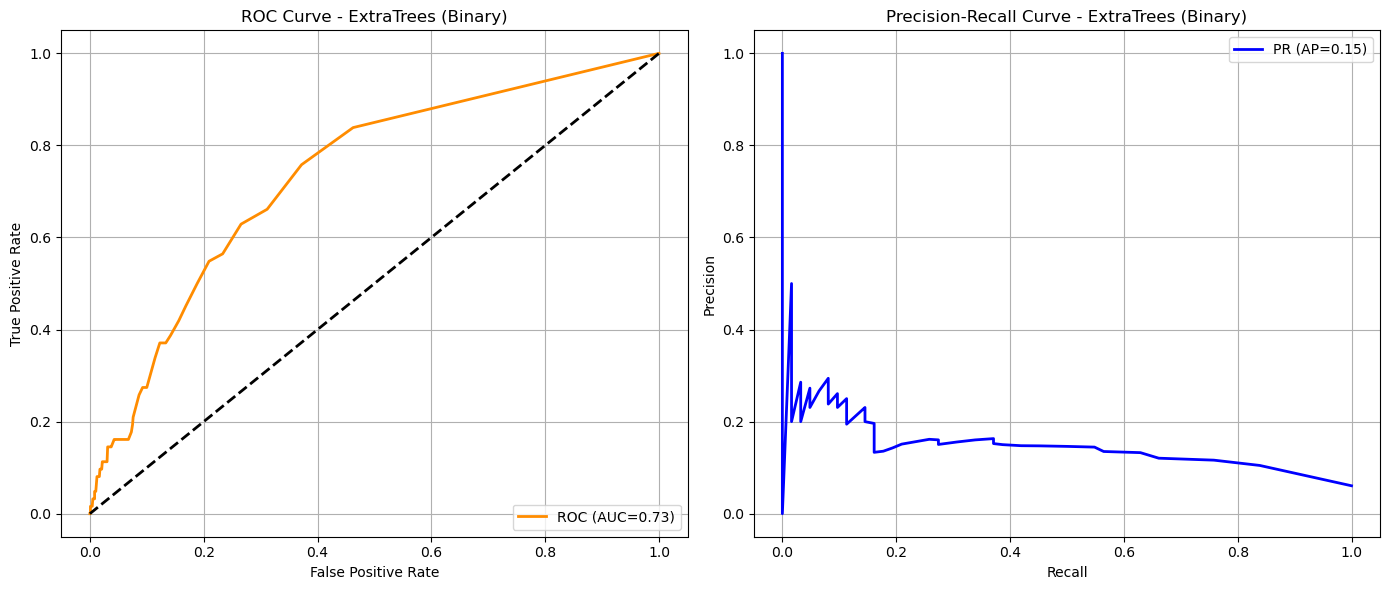


===== Model: Bagging =====


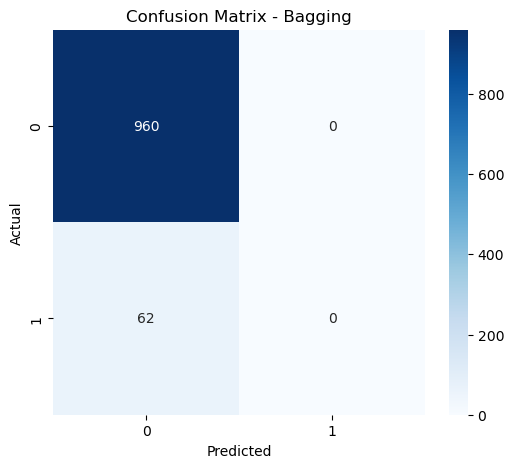


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

ROC-AUC (binary): 0.821


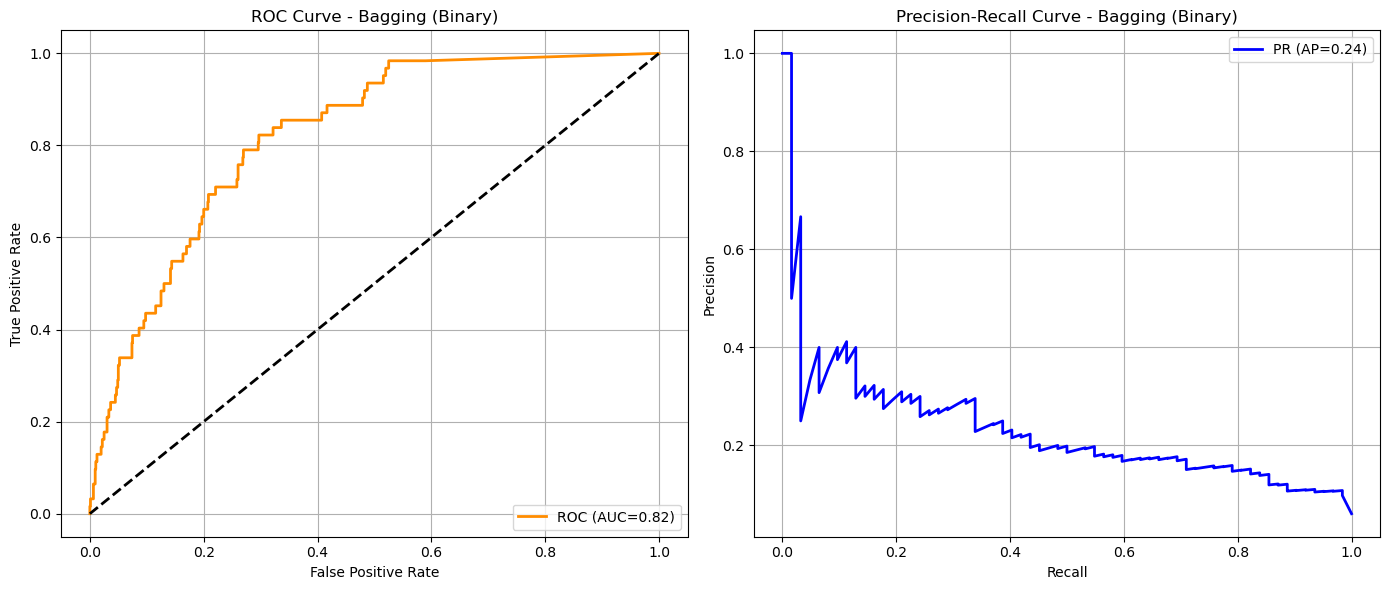


===== Model: AdaBoost =====


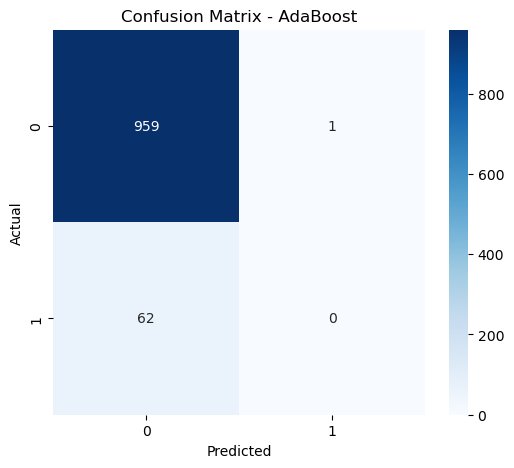


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

ROC-AUC (binary): 0.836


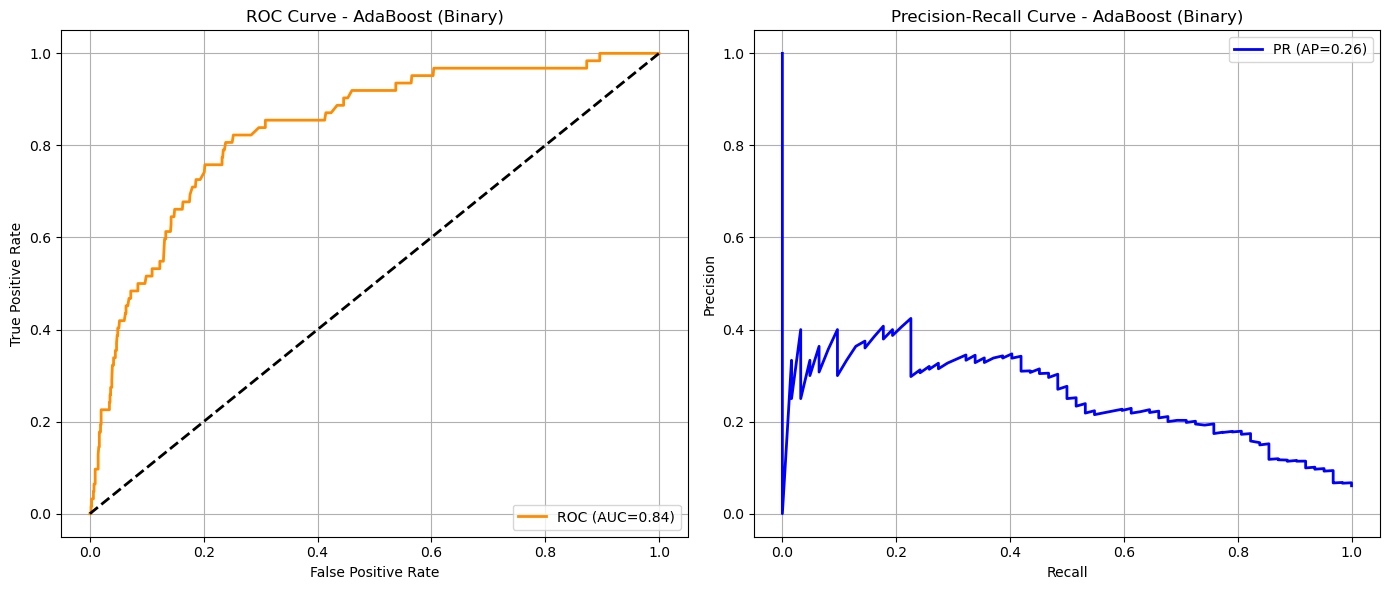


===== Model: GradientBoosting =====


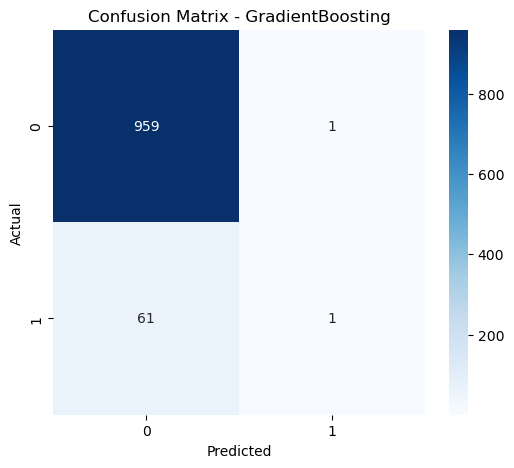


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.50      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.72      0.51      0.50      1022
weighted avg       0.91      0.94      0.91      1022

ROC-AUC (binary): 0.844


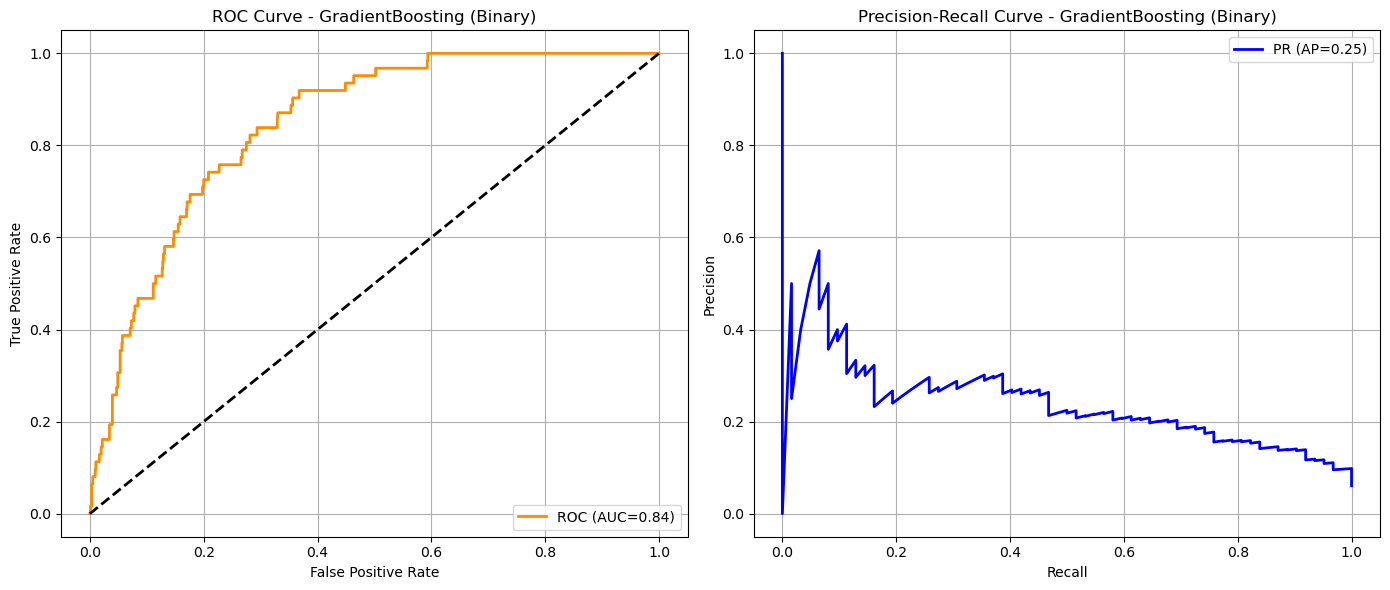


===== Model: HistGradientBoosting =====


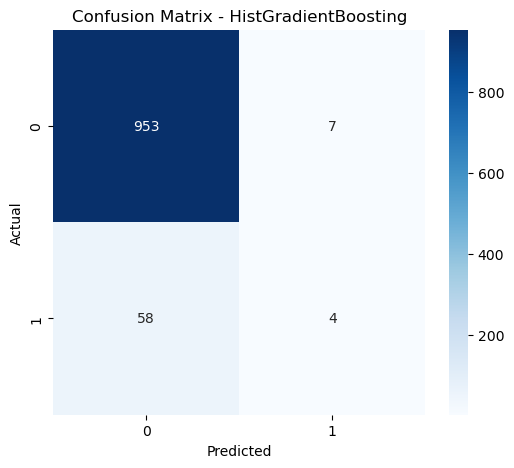


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.36      0.06      0.11        62

    accuracy                           0.94      1022
   macro avg       0.65      0.53      0.54      1022
weighted avg       0.91      0.94      0.92      1022

ROC-AUC (binary): 0.812


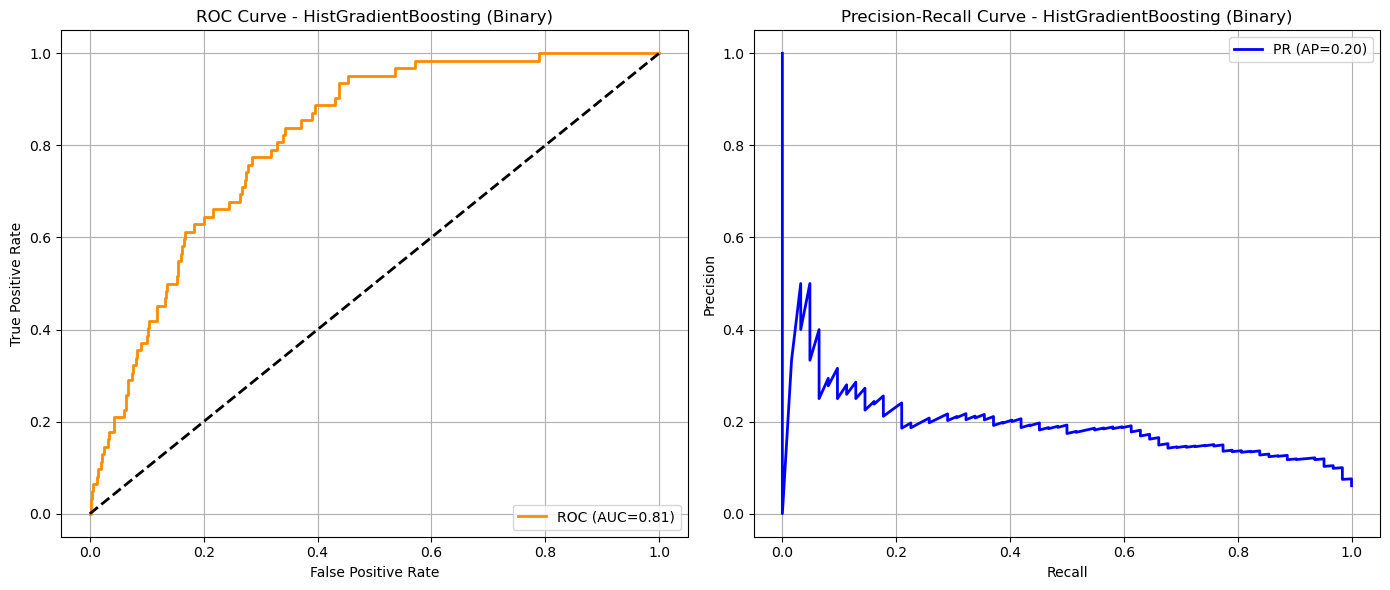


===== Model: XGBoost =====


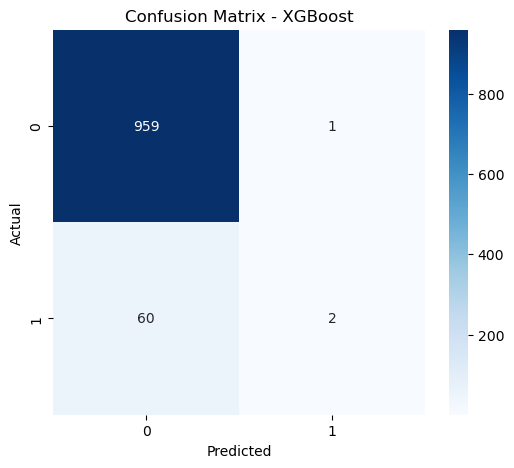


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.67      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg       0.80      0.52      0.52      1022
weighted avg       0.92      0.94      0.91      1022

ROC-AUC (binary): 0.822


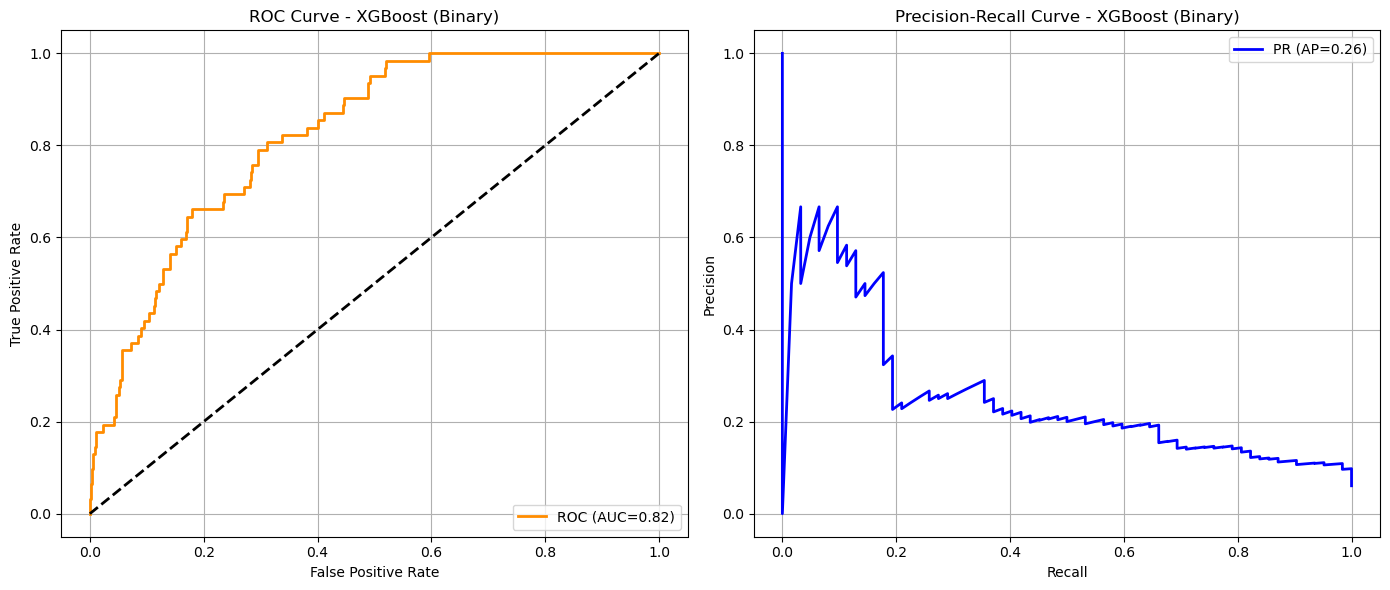


===== Model: CatBoost =====


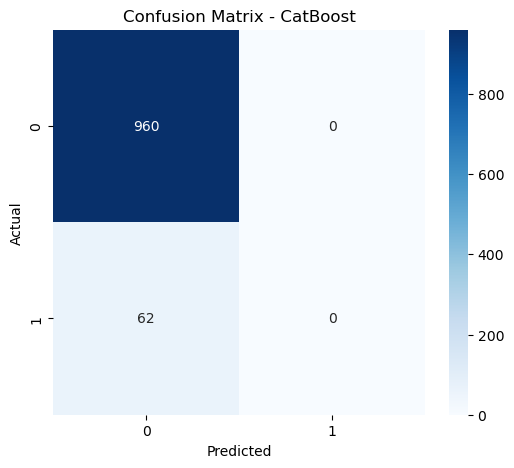


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

ROC-AUC (binary): 0.851


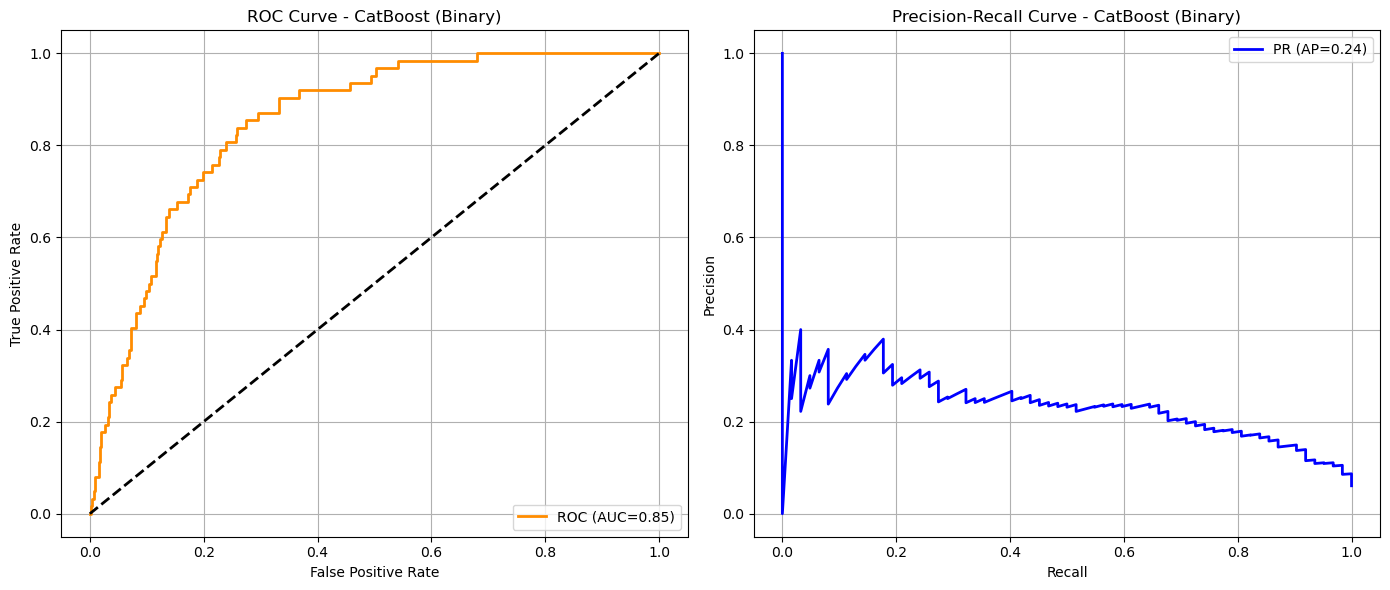


===== Model: LightGBM =====
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 187, number of negative: 3901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 4088, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.045744 -> initscore=-3.037880
[LightGBM] [Info] Start training from score -3.037880


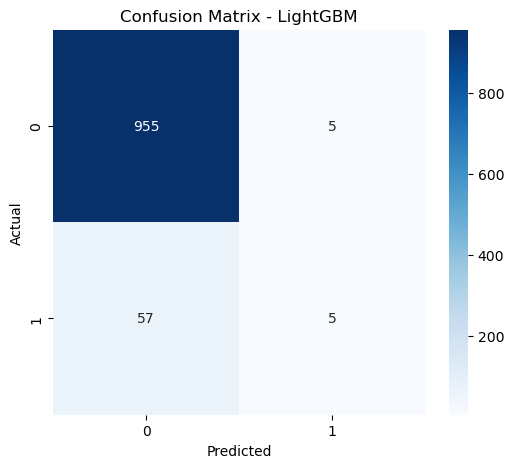


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.50      0.08      0.14        62

    accuracy                           0.94      1022
   macro avg       0.72      0.54      0.55      1022
weighted avg       0.92      0.94      0.92      1022

ROC-AUC (binary): 0.818


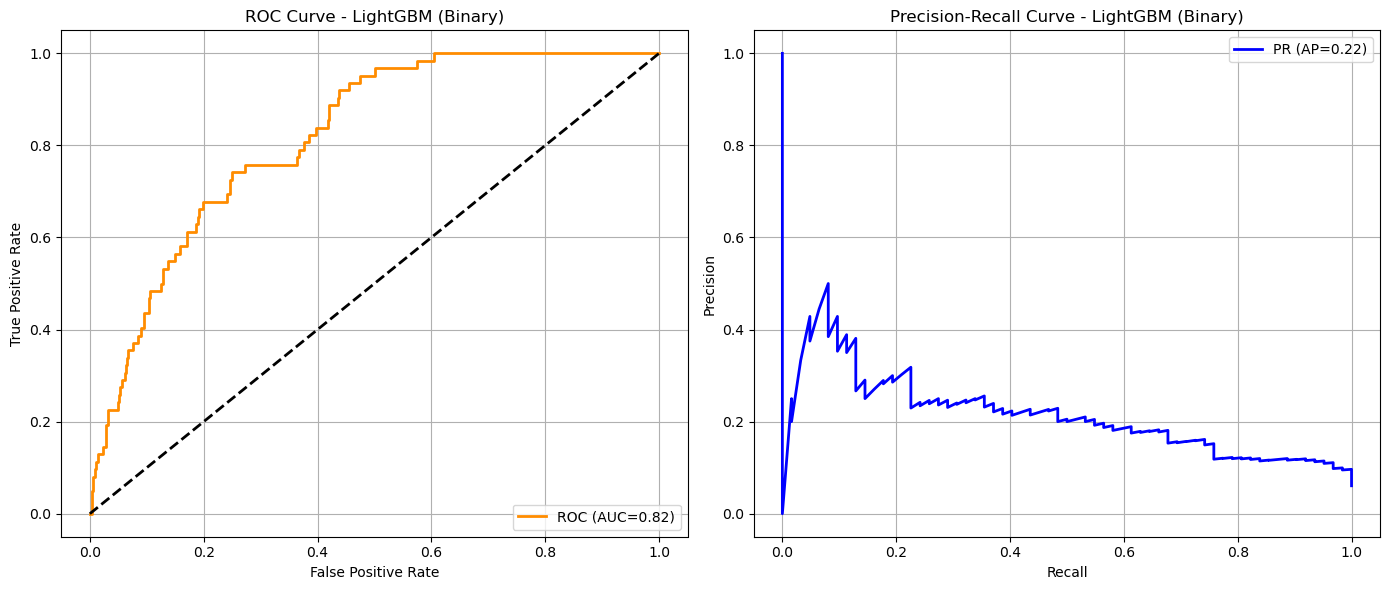


✅ Models sorted by Test Accuracy:
                   Model  Train_Acc  Train_Prec  Train_Rec  Train_F1  \
9                XGBoost   0.966977    0.966889   0.966977  0.958348   
0    Logistic Regression   0.954256    0.910605   0.954256  0.931920   
3          Random Forest   0.962084    0.963533   0.962084  0.949036   
5                Bagging   0.966487    0.967624   0.966487  0.957090   
7       GradientBoosting   0.960127    0.958891   0.960127  0.945782   
10              CatBoost   0.955235    0.949830   0.955235  0.934751   
11              LightGBM   0.994129    0.994098   0.994129  0.993971   
6               AdaBoost   0.953278    0.922423   0.953278  0.932358   
4             ExtraTrees   1.000000    1.000000   1.000000  1.000000   
8   HistGradientBoosting   0.992661    0.992669   0.992661  0.992378   
2          Decision Tree   0.968689    0.966586   0.968689  0.962218   
1             GaussianNB   0.321918    0.955436   0.321918  0.434177   

    Test_Acc  Test_Prec  Tes

In [35]:
# -----------------------------
# 1️⃣ Initialize list to store results
# -----------------------------
results = []

# -----------------------------
# 2️⃣ Loop through models
# -----------------------------
for model_name, model in models.items():
    print(f"\n===== Model: {model_name} =====")

    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Metrics
    Acc_Train = accuracy_score(y_train, y_pred_train)
    Acc_Test  = accuracy_score(y_test, y_pred_test)
    Pre_Train = precision_score(y_train, y_pred_train, average='weighted')
    Pre_Test  = precision_score(y_test, y_pred_test, average='weighted')
    Rec_Train = recall_score(y_train, y_pred_train, average='weighted')
    Rec_Test  = recall_score(y_test, y_pred_test, average='weighted')
    F1_Train  = f1_score(y_train, y_pred_train, average='weighted')
    F1_Test   = f1_score(y_test, y_pred_test, average='weighted')

    # Append results
    results.append([model_name, Acc_Train, Pre_Train, Rec_Train, F1_Train,
                    Acc_Test, Pre_Test, Rec_Test, F1_Test])

    # -----------------------------
    # Confusion Matrix
    # -----------------------------
    cm = confusion_matrix(y_test, y_pred_test)
    class_labels = np.unique(y_test)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_test))

    # -----------------------------
    # ROC & Precision-Recall
    # -----------------------------
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)
        n_classes = len(class_labels)

        # Binary case
        if n_classes == 2:
            fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
            roc_auc_val = auc(fpr, tpr)
            roc_auc_score_val = roc_auc_score(y_test, y_probs[:, 1])
            print(f"ROC-AUC (binary): {roc_auc_score_val:.3f}")

            plt.figure(figsize=(14,6))
            # ROC
            plt.subplot(1,2,1)
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC={roc_auc_val:.2f})')
            plt.plot([0,1],[0,1],'k--', lw=2)
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {model_name} (Binary)')
            plt.legend(loc="lower right")
            plt.grid(True)

            # Precision-Recall
            plt.subplot(1,2,2)
            precision, recall, _ = precision_recall_curve(y_test, y_probs[:,1])
            avg_prec = average_precision_score(y_test, y_probs[:,1])
            plt.plot(recall, precision, color='blue', lw=2, label=f'PR (AP={avg_prec:.2f})')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title(f'Precision-Recall Curve - {model_name} (Binary)')
            plt.legend(loc="best")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        # Multi-class case
        else:
            y_test_bin = label_binarize(y_test, classes=class_labels)

            # ROC-AUC
            roc_auc_weighted = roc_auc_score(y_test_bin, y_probs, multi_class='ovr', average='weighted')
            print(f"ROC-AUC (weighted OvR): {roc_auc_weighted:.3f}")

            # PR curves
            plt.figure(figsize=(14,6))

            # --- ROC Curve ---
            plt.subplot(1,2,1)
            fpr = dict(); tpr = dict(); roc_auc = dict()
            for i, label in enumerate(class_labels):
                fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])
                plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {label} (AUC={roc_auc[i]:.2f})')

            # Macro-average
            all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
            mean_tpr = np.zeros_like(all_fpr)
            for i in range(n_classes):
                mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
            mean_tpr /= n_classes
            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr
            roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
            plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle=':', lw=4, label=f'Macro-average (AUC={roc_auc["macro"]:.2f})')

            plt.plot([0,1],[0,1],'k--', lw=2)
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {model_name} (Multi-Class)')
            plt.legend(loc="lower right")
            plt.grid(True)

            # --- Precision-Recall Curve ---
            plt.subplot(1,2,2)
            colors = ['red', 'green', 'blue', 'orange', 'purple']
            for i, label in enumerate(class_labels):
                precision, recall, _ = precision_recall_curve(y_test_bin[:,i], y_probs[:,i])
                avg_prec_i = average_precision_score(y_test_bin[:,i], y_probs[:,i])
                plt.plot(recall, precision, lw=2, color=colors[i % len(colors)], label=f'Class {label} (AP={avg_prec_i:.2f})')

            # Macro-average AP
            avg_prec_macro = average_precision_score(y_test_bin, y_probs, average="macro")
            plt.plot([0,1],[avg_prec_macro, avg_prec_macro], color='navy', linestyle=':', lw=4, label=f'Macro-average (AP={avg_prec_macro:.2f})')

            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title(f'Precision-Recall Curve - {model_name} (Multi-Class)')
            plt.legend(loc="best")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

# -----------------------------
# 3️⃣ Create Results DataFrame
# -----------------------------
columns = ["Model", "Train_Acc", "Train_Prec", "Train_Rec", "Train_F1",
           "Test_Acc", "Test_Prec", "Test_Rec", "Test_F1"]

if len(results) > 0:
    df_results = pd.DataFrame(results, columns=columns).drop_duplicates(subset="Model")
    df_results = df_results.sort_values(by="Test_Acc", ascending=False)
    print("\n✅ Models sorted by Test Accuracy:")
    print(df_results)
else:
    print("⚠️ Warning: 'results' list is empty. No DataFrame created.")

In [36]:
# Define column names for the results dataframe
columns = ["Model", "Train_Acc", "Train_Prec", "Train_Rec", "Train_F1",
           "Test_Acc", "Test_Prec", "Test_Rec", "Test_F1"]

# Create DataFrame from results and remove duplicate models
df1 = pd.DataFrame(results, columns=columns).drop_duplicates(subset="Model")

# Sort models by Test Accuracy in descending order (best models first)
df1 = df1.sort_values(by="Test_Acc", ascending=False)

In [37]:
# Display the top 12 models with the highest test accuracy
df1.head(12)

,Model,Train_Acc,Train_Prec,Train_Rec,Train_F1,Test_Acc,Test_Prec,Test_Rec,Test_F1
9,XGBoost,0.966977,0.966889,0.966977,0.958348,0.940313,0.924469,0.940313,0.914114
0,Logistic Regression,0.954256,0.910605,0.954256,0.931920,0.939335,0.882350,0.939335,0.909951
3,Random Forest,0.962084,0.963533,0.962084,0.949036,0.939335,0.882350,0.939335,0.909951
5,Bagging,0.966487,0.967624,0.966487,0.957090,0.939335,0.882350,0.939335,0.909951
7,GradientBoosting,0.960127,0.958891,0.960127,0.945782,0.939335,0.913491,0.939335,0.911817
10,CatBoost,0.955235,0.949830,0.955235,0.934751,0.939335,0.882350,0.939335,0.909951
11,LightGBM,0.994129,0.994098,0.994129,0.993971,0.939335,0.916760,0.939335,0.918228
6,AdaBoost,0.953278,0.922423,0.953278,0.932358,0.938356,0.882294,0.938356,0.909462
4,ExtraTrees,1.000000,1.000000,1.000000,1.000000,0.936399,0.901140,0.936399,0.911937
8,HistGradientBoosting,0.992661,0.992669,0.992661,0.992378,0.936399,0.907506,0.936399,0.915005


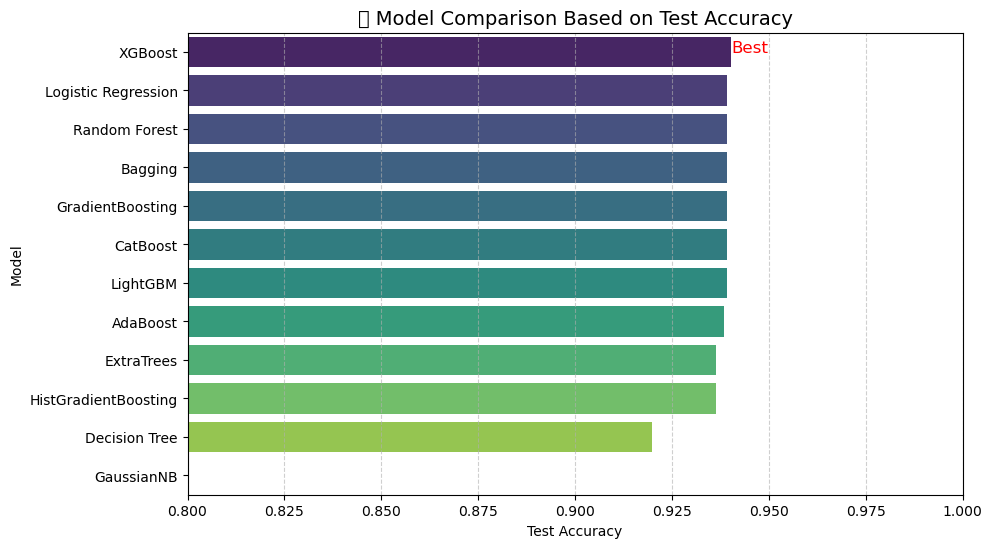

In [38]:
# 📊 Comparison chart between models based on Test Accuracy

plt.figure(figsize=(10,6))
sns.barplot(
    data=df1.sort_values(by='Test_Acc', ascending=False),
    x='Test_Acc', y='Model',
    palette='viridis'
)

plt.title('🔹 Model Comparison Based on Test Accuracy', fontsize=14)
plt.xlabel('Test Accuracy')
plt.ylabel('Model')
plt.xlim(0.8, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Distinguish the best model with a different color
best_model = df1.loc[df1['Test_Acc'].idxmax(), 'Model']
best_acc = df1['Test_Acc'].max()
plt.text(best_acc, list(df1['Model']).index(best_model), 'Best', color='red', fontsize=12)

plt.show()


Stacking Classification

In [39]:
from sklearn.ensemble import StackingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Define base models for the stacking ensemble
base_models = [
    ('extratrees', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('histgb', HistGradientBoostingClassifier(max_iter=100, random_state=42)),
    ('lgb', LGBMClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric='logloss', random_state=42)),
    ('cat', CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=0, random_state=42))
]

# Define meta-model (final estimator) that will combine base models' predictions
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Create stacking ensemble classifier
stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

# Train the stacking ensemble on the balanced training data (after SMOTE)
stack_model.fit(X_train, y_train)

# Make predictions on training and test sets
y_pred_train = stack_model.predict(X_train)
y_pred_test = stack_model.predict(X_test) 

# Calculate performance metrics and store results
results = {
    "Model": "Stacking Ensemble (SMOTE)",
    "Train_Acc": accuracy_score(y_train, y_pred_train),
    "Train_Prec": precision_score(y_train, y_pred_train, average='weighted'),
    "Train_Rec": recall_score(y_train, y_pred_train, average='weighted'),
    "Train_F1": f1_score(y_train, y_pred_train, average='weighted'),
    "Test_Acc": accuracy_score(y_test, y_pred_test),
    "Test_Prec": precision_score(y_test, y_pred_test, average='weighted'),
    "Test_Rec": recall_score(y_test, y_pred_test, average='weighted'),
    "Test_F1": f1_score(y_test, y_pred_test, average='weighted')
}

# Create and display results dataframe
df_results = pd.DataFrame([results])
print(df_results)

                       Model  Train_Acc  Train_Prec  Train_Rec  Train_F1  \
0  Stacking Ensemble (SMOTE)    0.96135    0.962855    0.96135  0.947598   

   Test_Acc  Test_Prec  Test_Rec   Test_F1  
0  0.938356   0.882294  0.938356  0.909462  
